In [ ]:
%pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-linux_x86_64.whl size=3366553 sha256=a5a2e1dbfe4ac84c74eca212332acd96cc9b187318f078de80b2b1b0583a6dcf
  Stored in directory: /root/.cache/pip/wheels/af/db/86/2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [ ]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from operator import itemgetter
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from pandas.io.parsers.readers import read_csv

In [ ]:
# download the dataset
!wget -O data.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
!wget -O movies.csv https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv

--2023-03-01 19:08:37--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596528 (1.5M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.52M  --.-KB/s    in 0.04s   

2023-03-01 19:08:37 (34.4 MB/s) - ‘data.csv’ saved [1596528/1596528]

--2023-03-01 19:08:38--  https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/movies.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 O

In [ ]:
reader = Reader(rating_scale=(0.5, 5))

panda_data = read_csv('https://raw.githubusercontent.com/emiletimothy/Caltech-CS155-2023/main/miniproject2/data/data.csv')
data = Dataset.load_from_df(panda_data[['User ID', 'Movie ID', 'Rating']], reader)

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
svd = SVD(n_epochs=100, n_factors=20, lr_all=.03)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10)

trainset, testset = train_test_split(data, test_size=.1)
info = svd.fit(trainset)
predictions = svd.test(testset)
accuracy.rmse(predictions)

RMSE: 0.9221


0.9220859462802664

In [ ]:
"""
Attributes:
        pu(numpy array of size (n_users, n_factors)): The user factors (only
            exists if ``fit()`` has been called)
        qi(numpy array of size (n_items, n_factors)): The item factors (only
            exists if ``fit()`` has been called)
        bu(numpy array of size (n_users)): The user biases (only
            exists if ``fit()`` has been called)
        bi(numpy array of size (n_items)): The item biases (only
            exists if ``fit()`` has been called)
"""

U = info.pu
V = info.qi

A, _, _ = np.linalg.svd(V.T)


A12T = A[:, [0, 1]].T

Vsquiggle = A12T @ V.T
Usquiggle = A12T @ U.T

# rescale the dimensions
Usquiggle[[0], :] = Usquiggle[[0], :] / np.std(Usquiggle[[0], :])
Usquiggle[[1], :] = Usquiggle[[1], :] / np.std(Usquiggle[[1], :])

Vsquiggle[[0], :] = Vsquiggle[[0], :] / np.std(Vsquiggle[[0], :])
Vsquiggle[[1], :] = Vsquiggle[[1], :] / np.std(Vsquiggle[[1], :])

In [ ]:
user_data = {'User ID': [], 'Movie ID': [], 'Rating': []}
movie_data = {}

with open('movies.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  fieldnames = next(reader)
  for field in fieldnames:
    movie_data[field] = []
  for row in reader:
    for i in range(len(fieldnames)):
      field = fieldnames[i]
      spec_row = row[i]
      movie_data[field].append(spec_row)

with open('data.csv') as csvfile:
  fieldnames = ['User ID', 'Movie ID', 'Rating']
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    user_data['User ID'].append(row[0])
    user_data['Movie ID'].append(row[1])
    user_data['Rating'].append(row[2])

In [ ]:
arr_most_rating = {}
arr_sum_rating = {}

for i in range(len(user_data['Movie ID'])):
  movie = user_data['Movie ID'][i]
  rating = user_data['Rating'][i]
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
    arr_sum_rating[movie] += float(rating)
  else:
    arr_most_rating[movie] = 1
    arr_sum_rating[movie] = float(rating)

avg_rating = {}
for key in arr_most_rating:
  num_occ = arr_most_rating[key]
  sum_of_ratings = arr_sum_rating[key]
  avg = sum_of_ratings/num_occ
  avg_rating[key]= avg


ten_highest_ratings = dict(sorted(avg_rating.items(), key = itemgetter(1), reverse = True)[:10])

list_most_rating_names = []
for key in ten_highest_ratings:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie ID'][i] == key:
      list_most_rating_names.append(movie_data['Movie Title'][i])

key_to_name_most_ratings = {}
for key in list_most_rating_names:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie Title'][i] == key:
      key_to_name_most_ratings[movie_data['Movie ID'][i]] = key
print(key_to_name_most_ratings)

{'1020': 'Planet Earth (2006)', '157': 'Black Mirror: White Christmas (2014)', '53': 'Akeelah and the Bee (2006)', '120': 'Barbarian Invasions, The (Les invasions barbares) (2003)', '811': 'Louis C.K.: Live at The Comedy Store (2015)', '171': "Blue Is the Warmest Color (La vie d'Adèle) (2013)", '393': 'Elite Squad: The Enemy Within (Tropa de Elite 2 - O Inimigo Agora É Outro) (2010)', '258': 'City of God (Cidade de Deus) (2002)', '646': 'Incendies (2010)', '1009': 'Piper (2016)'}


In [ ]:
arr_most_rating = {}

for movie in user_data['Movie ID']:
  if movie in arr_most_rating:
    arr_most_rating[movie] += 1
  else:
    arr_most_rating[movie] = 1

ten_highest_ratings = dict(sorted(arr_most_rating.items(), key = itemgetter(1), reverse = True)[:10])

list_most_rating_names = []
for key in ten_highest_ratings:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie ID'][i] == key:
      list_most_rating_names.append(movie_data['Movie Title'][i])

key_to_name_most_popular = {}
for key in list_most_rating_names:
  for i in range(len(movie_data['Movie ID'])):
    if movie_data['Movie Title'][i] == key:
      key_to_name_most_popular[movie_data['Movie ID'][i]] = key
print(key_to_name_most_popular)

{'804': 'Lord of the Rings: The Fellowship of the Ring, The (2001)', '806': 'Lord of the Rings: The Two Towers, The (2002)', '805': 'Lord of the Rings: The Return of the King, The (2003)', '1173': 'Shrek (2001)', '1015': 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)', '310': 'Dark Knight, The (2008)', '445': 'Finding Nemo (2003)', '728': 'Kill Bill: Vol. 1 (2003)', '897': 'Monsters, Inc. (2001)', '954': "Ocean's Eleven (2001)"}


In [ ]:
# 1094 rogue one
movie_ids_of_super = [676, 677, 661, 438, 1031, 487, 1119, 253, 1196, 228]
movie_ids_of_mystery = [1130, 1131, 1177, 586, 265, 344, 877, 1178, 1354, 1460]
movie_ids_of_children = [445, 150, 137, 97, 1319, 135, 1417, 1360, 1173, 1174]
movie_ids_of_comedy = [0, 5, 9, 15, 16, 17, 19, 22, 29, 30]

super_dict = {}
for id in movie_ids_of_super:
  super_dict[str (id)] = movie_data['Movie Title'][id]

mystery_dict = {}
for id in movie_ids_of_mystery:
  mystery_dict[str (id)] = movie_data['Movie Title'][id]

children_dict = {}
for id in movie_ids_of_children:
  children_dict[str (id)] = movie_data['Movie Title'][id]

comedy_dict = {}
for id in movie_ids_of_comedy:
  comedy_dict[str (id)] = movie_data['Movie Title'][id]

In [ ]:
def generate_graph(ind_to_name_dict, name):
  X = []
  y = []
  labels = []

  for ind in ind_to_name_dict:
    ind = int (ind)
    point = Vsquiggle[:, [ind]]
    X.append(point[0][0])
    y.append(point[1][0])
    labels.append(ind_to_name_dict[str (ind)])

  fig, ax = plt.subplots(figsize=(10, 10))
  ax.scatter(X, y)

  for i, txt in enumerate(labels):
      ax.annotate(txt, (X[i], y[i]))

  ax.set_title(name)

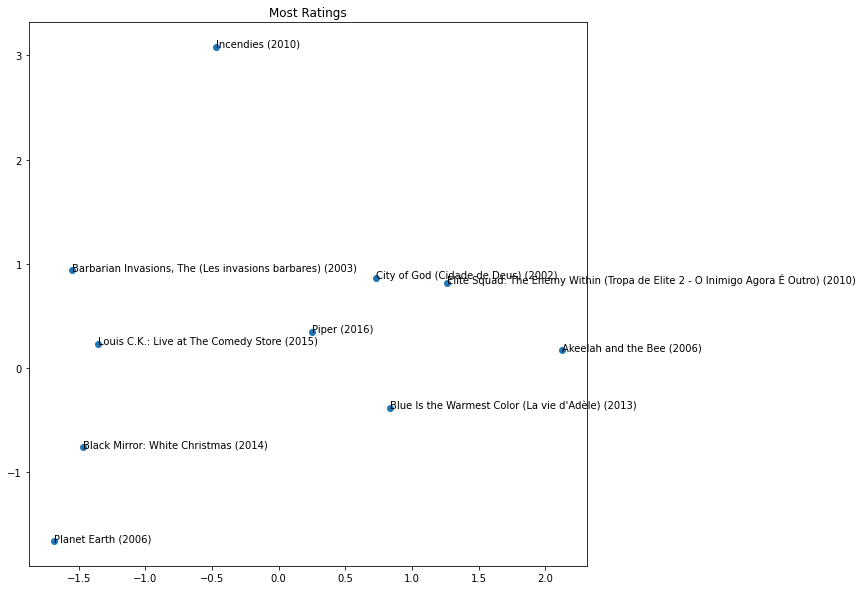

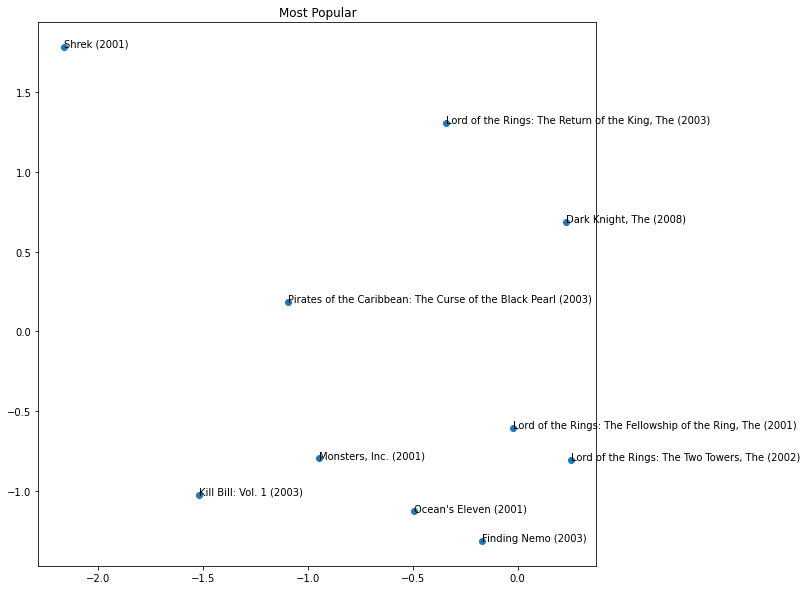

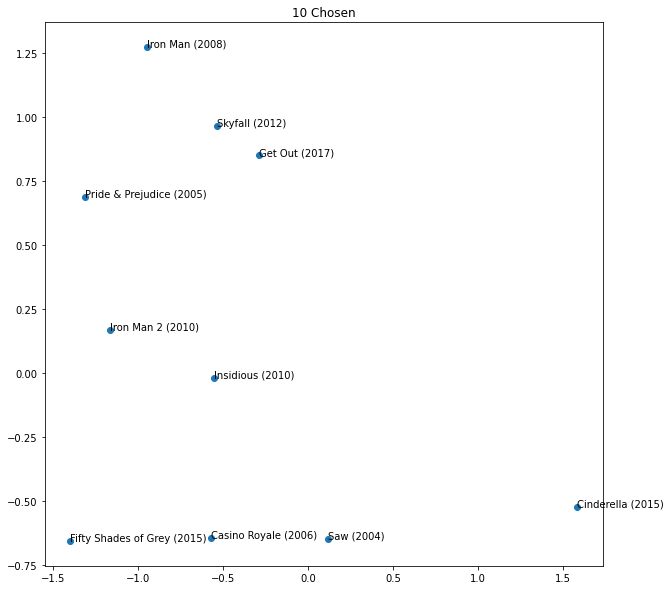

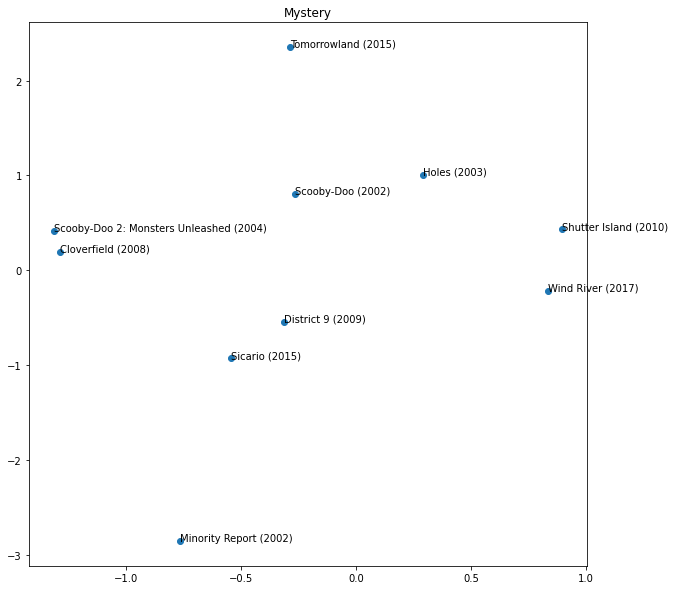

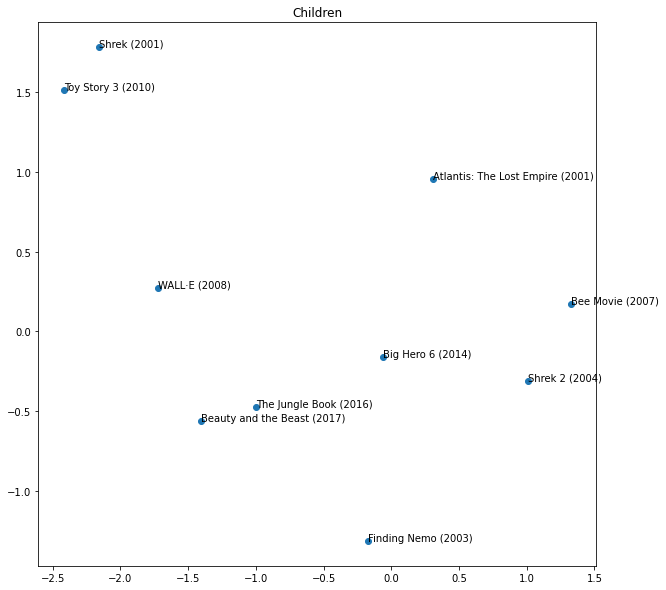

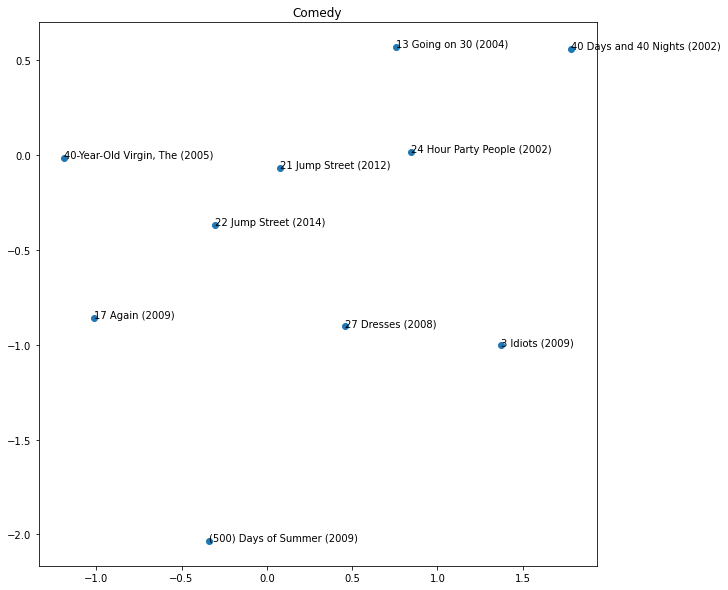

In [ ]:
generate_graph(key_to_name_most_ratings, 'Most Ratings')
generate_graph(key_to_name_most_popular, 'Most Popular')
generate_graph(super_dict, '10 Chosen')
generate_graph(mystery_dict, 'Mystery')
generate_graph(children_dict, 'Children')
generate_graph(comedy_dict, 'Comedy')